# Steps to approach the problem
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyper parameters and improve the model (reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the data 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-24 01:48:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   165MB/s    in 3.0s    

2022-09-24 01:48:42 (165 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
# Walk through the data
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in 10_food_classes_all_data
There are 10 directories and 0 files in 10_food_classes_all_data/train
There are 0 directories and 750 files in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 files in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 files in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 files in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 files in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 files in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 files in 10_food_classes_all_data/train/steak
There are 0 directories and 750 files in 10_food_classes_all_data/train/fried_rice
There are 10 directories and 0 files in 10_food

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Let's get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


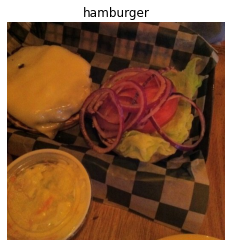

In [9]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

### 2. Preprocess the data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model

In [11]:
import tensorflow as tf

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [12]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 194ms/step - loss: 2.1553 - accuracy: 0.2040 - val_loss: 2.0923 - val_accuracy: 0.2448
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.9513 - accuracy: 0.3120 - val_loss: 1.9119 - val_accuracy: 0.3120
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.7414 - accuracy: 0.4040 - val_loss: 1.8990 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 45s 191ms/step - loss: 1.5490 - accuracy: 0.4708 - val_loss: 1.9155 - val_accuracy: 0.3488
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 1.3467 - accuracy: 0.5448 - val_loss: 2.0064 - val_accuracy: 0.3444


### 5. Evaluate the model

In [13]:
model_1.evaluate(test_data)

79/79 [==============================] - 14s 178ms/step - loss: 2.0064 - accuracy: 0.3444


[2.0064172744750977, 0.34439998865127563]

In [14]:
# Plot the loss curves
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

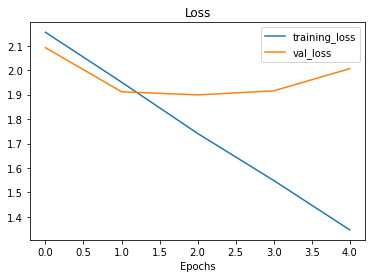

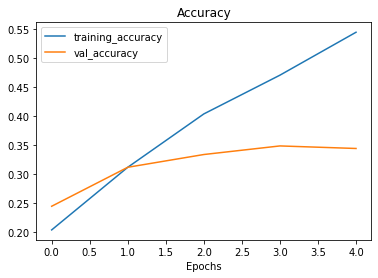

In [15]:
plot_loss_curves(history_1)

- From above we can see that the loss curve is too bad for test data. This means that the model is overfitting

### 6. Adjust the hyperparameters to reduce overfitting

- Steps
1. Get more data
2. Simplify the model - reduce layers
3. Data Augmentation
4. Transfer learning

### Simplify the model

In [19]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [20]:
# Fit the model
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 51s 216ms/step - loss: 2.1740 - accuracy: 0.2029 - val_loss: 1.9844 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.9057 - accuracy: 0.3349 - val_loss: 1.8920 - val_accuracy: 0.3332
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.7223 - accuracy: 0.4137 - val_loss: 1.8850 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 1.5132 - accuracy: 0.4853 - val_loss: 1.8999 - val_accuracy: 0.3644
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 1.2738 - accuracy: 0.5741 - val_loss: 2.0397 - val_accuracy: 0.3336


79/79 [==============================] - 12s 157ms/step - loss: 2.0397 - accuracy: 0.3336


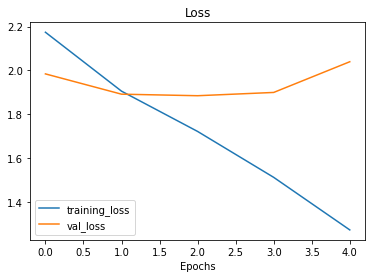

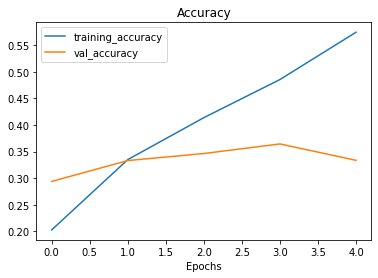

In [21]:
# Evaluate the model
model_2.evaluate(test_data)
plot_loss_curves(history_2)

### Data Augmentation

In [25]:
from tensorflow.python.ops.batch_ops import batch
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [26]:
# Create the model using clone_model
model_3 = tf.keras.models.clone_model(model_1)

# compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [28]:
# fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 116s 494ms/step - loss: 2.1904 - accuracy: 0.1916 - val_loss: 2.0313 - val_accuracy: 0.2500
Epoch 2/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0759 - accuracy: 0.2624 - val_loss: 1.9066 - val_accuracy: 0.3296
Epoch 3/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0061 - accuracy: 0.2973 - val_loss: 1.8793 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9758 - accuracy: 0.3033 - val_loss: 1.8199 - val_accuracy: 0.3632
Epoch 5/5
235/235 [==============================] - 110s 467ms/step - loss: 1.9317 - accuracy: 0.3281 - val_loss: 1.8255 - val_accuracy: 0.3568


79/79 [==============================] - 11s 142ms/step - loss: 1.8255 - accuracy: 0.3568


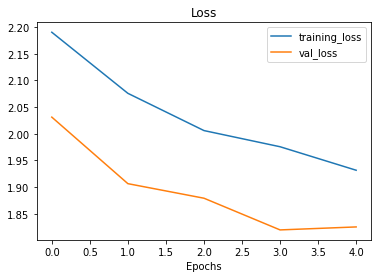

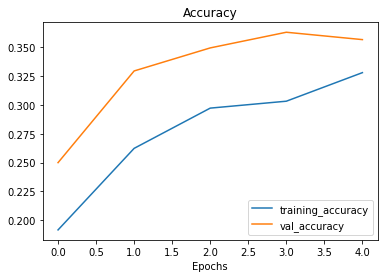

In [29]:
model_3.evaluate(test_data)
plot_loss_curves(history_3)

## Make a Prediction

In [30]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [32]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [33]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

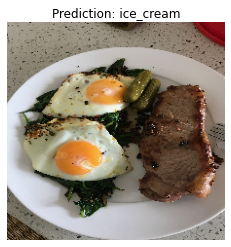

In [34]:
pred_and_plot(model_3, "03-steak.jpeg", class_names)

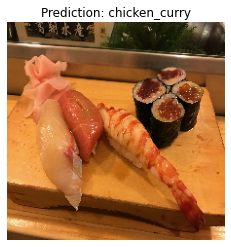

In [35]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

## Saving the model

In [36]:
model_3.save("trained_model")

## Loading the model

In [37]:
loaded_model = tf.keras.models.load_model("trained_model")

## Evaluate with the loaded model

In [38]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.8255 - accuracy: 0.3568


[1.8254544734954834, 0.35679998993873596]